<ipython-input-6-2c7f2b3a40bf>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', palette='coolwarm')


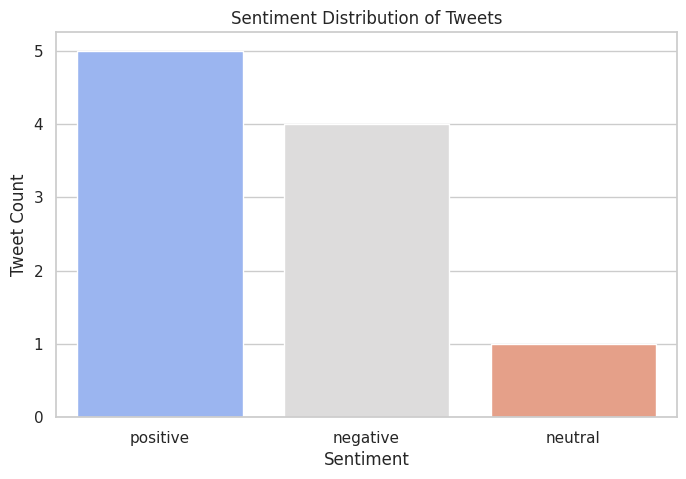

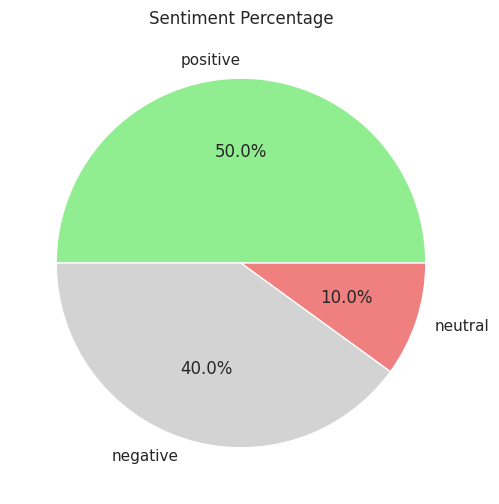


Sample positive tweet:
I love the new features in the AI model!

Sample neutral tweet:
AI is transforming the future of work.

Sample negative tweet:
The app keeps crashing every 5 minutes. Frustrating!

Summary:
Total tweets analyzed: 10
Positive: 5 (50.0%)
Neutral: 1 (10.0%)
Negative: 4 (40.0%)

Results saved as 'sentiment_results.csv'


In [6]:
# Install required libraries
!pip install textblob seaborn --quiet

# Imports
import pandas as pd
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt

# Sample tweets dataset (replace or add more if you want)
tweets = [
    "I love the new features in the AI model!",
    "The app keeps crashing every 5 minutes. Frustrating!",
    "Not bad, but could be better.",
    "AI is transforming the future of work.",
    "I’m so bored of hearing about AI all the time.",
    "This update is amazing. Kudos to the team!",
    "Neutral on this topic, nothing special.",
    "The UI is cluttered and hard to navigate.",
    "Great progress in such a short time!",
    "No strong feelings about the news."
]

# Create DataFrame
df = pd.DataFrame(tweets, columns=["text"])

# Function for sentiment analysis
def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return 'positive'
    elif polarity == 0:
        return 'neutral'
    else:
        return 'negative'

df["sentiment"] = df["text"].apply(get_sentiment)

# Set seaborn style
sns.set(style="whitegrid")

# Count plot for sentiment
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='sentiment', palette='coolwarm')
plt.title("Sentiment Distribution of Tweets")
plt.xlabel("Sentiment")
plt.ylabel("Tweet Count")
plt.show()

# Pie chart for sentiment percentage
sentiment_counts = df['sentiment'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=['lightgreen', 'lightgray', 'lightcoral'])
plt.title('Sentiment Percentage')
plt.show()

# Print sample tweets per sentiment
for sentiment in ['positive', 'neutral', 'negative']:
    print(f"\nSample {sentiment} tweet:")
    sample = df[df['sentiment'] == sentiment]['text'].head(1).values
    print(sample[0] if len(sample) > 0 else "No tweets found.")

# Summary insights
total = len(df)
pos = len(df[df.sentiment == 'positive'])
neu = len(df[df.sentiment == 'neutral'])
neg = len(df[df.sentiment == 'negative'])

print(f"\nSummary:")
print(f"Total tweets analyzed: {total}")
print(f"Positive: {pos} ({pos/total*100:.1f}%)")
print(f"Neutral: {neu} ({neu/total*100:.1f}%)")
print(f"Negative: {neg} ({neg/total*100:.1f}%)")

# Save results to CSV
df.to_csv("sentiment_results.csv", index=False)
print("\nResults saved as 'sentiment_results.csv'")
